# Trend and probability

In [1]:
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get data from yfinance (open high low close)
VOO = yf.Ticker("VOO")
dataset = VOO.history(start='2010-01-3', end='2023-01-01')[["Open", "High", "Low", "Close"]]
dataset.columns = ["open", "high", "low", "close"]
dataset.head(5)

,open,high,low,close
Date,,,,
2010-09-09 00:00:00-04:00,80.609943,80.609943,79.540387,79.681946
2010-09-10 00:00:00-04:00,79.965081,80.106641,79.666237,80.043724
2010-09-13 00:00:00-04:00,80.971681,81.113240,80.609920,81.050323
2010-09-14 00:00:00-04:00,80.877316,81.380642,80.515555,81.034607
2010-09-15 00:00:00-04:00,80.704334,81.302023,80.531317,81.239113


In [3]:
 dataset.tail(5)

,open,high,low,close
Date,,,,
2022-12-23 00:00:00-05:00,347.499208,350.506844,345.925700,350.427155
2022-12-27 00:00:00-05:00,350.317617,350.596467,347.419546,349.032898
2022-12-28 00:00:00-05:00,348.983122,350.755822,344.481637,344.750549
2022-12-29 00:00:00-05:00,347.479304,351.682001,347.041106,350.865356
2022-12-30 00:00:00-05:00,348.355690,350.048701,346.334016,349.899323


#### Using data for create some basic elements
- **AvgPrice**: the average price 
- **Range**: high - low 
- **Body**: the lenght of the body 
- **BodyRangePerc**: Body/Range, percentage of the body 
- **CO**: difference between Close and Open
- **OL**: difference between Open and Low 
- **HC**: difference between High and Close
- **HO**: difference between High and Open
- **CL**: differnce between Close and Low
- **ClosePerc**: where is the Close (inside the range), ex: 50% = the close is in the middle of the range


In [4]:
dataset['AvgPrice'] = round(dataset.mean(axis=1), 2)
dataset['Range'] = round(dataset.high - dataset.low, 2)
dataset['Body'] = abs(dataset.open - dataset.close)
dataset['CO'] = round(dataset.close - dataset.open, 2)
dataset['OL'] = round((dataset.open - dataset.low), 2)
dataset['HO'] = round((dataset.high - dataset.open), 2)
dataset['CL'] = round((dataset.close - dataset.low), 2)
dataset['HC'] = round((dataset.high - dataset.close), 2)
dataset['BodyRangePerc'] = round(dataset.Body/dataset.Range * 100, 2)
dataset['ClosePerc'] = round((dataset.close - dataset.low) * 100 / dataset.Range, 2)
dataset['Type'] = list(map(lambda x: "Negative" if x <= 0 else "Positive", dataset.CO))

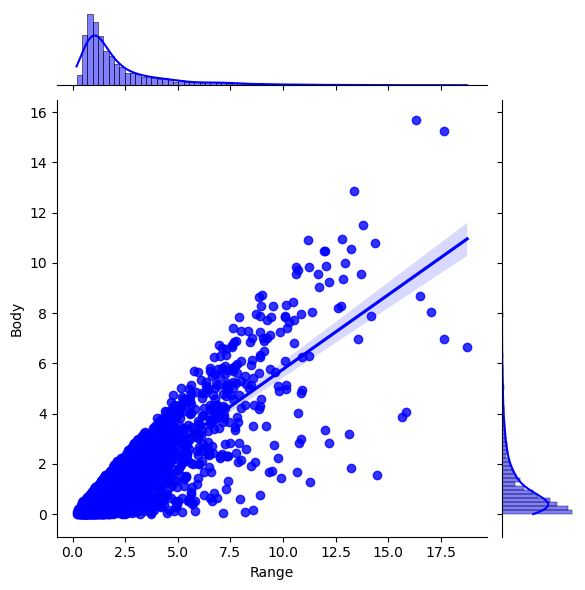

In [5]:
sns.jointplot(x='Range', y='Body', height=6, data=dataset, color='blue', kind='reg');
plt.show()

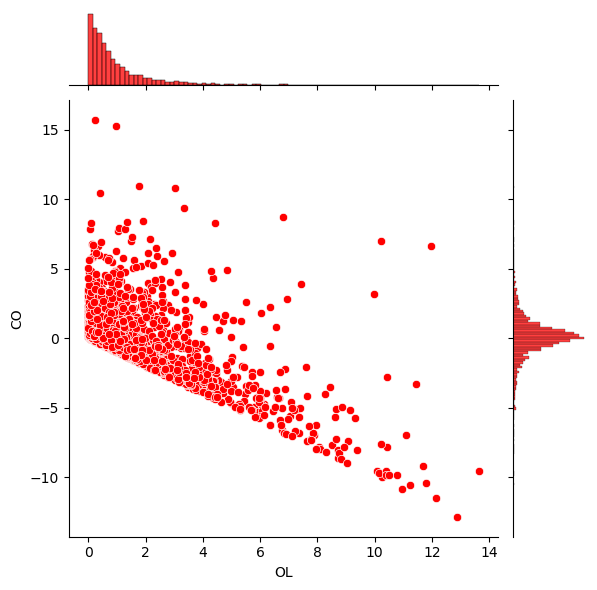

In [6]:
# define the trend as the different between close and open (Y) and the distance between OPEN and LOW as the max negative correction
sns.jointplot(x='OL', y='CO', height=6, data=dataset, kind='scatter', color='red');

The distribution of the observations is concetrated between -5 and 5 of Close-Open and between 0 and 4 of Open-low.

### Dividing the positive days from the negative, using lmplot
- Positive = green
- Negative = red 

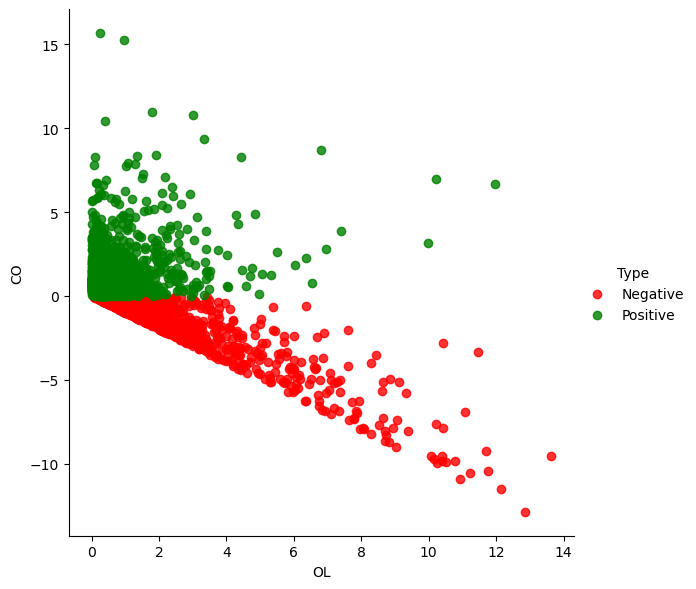

In [7]:
sns.lmplot(x="OL", y = "CO", height=6, hue="Type", data=dataset, fit_reg=False,
          palette=dict(Positive="green", Negative="red"));

### Report and  Long Stop-Loss set up 

In [8]:
print("Positive:", dataset[dataset['CO'] > 0]['OL'].describe([.25, .5, .75, .8, .9, .95, .99]).transpose())
print("")
print("Long Stop-Loss set up on the 95th quantile of the distribution:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.95), 2))
print("Long Stop-Loss set up on the 99th quantile of the distribution:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.99), 2))

Positive: count    1676.000000
mean        0.613663
std         0.932161
min         0.000000
25%         0.130000
50%         0.320000
75%         0.700000
80%         0.830000
90%         1.440000
95%         2.240000
99%         4.490000
max        11.970000
Name: OL, dtype: float64

Long Stop-Loss set up on the 95th quantile of the distribution: -2.24
Long Stop-Loss set up on the 99th quantile of the distribution: -4.49
